In [ ]:
**I.S.362 Data Acquistion and Management-Randi Sheppard**
##Final Project- Predictive Analysis on Cyber Attacks on Healthcare##

In [2]:
import pandas as pd

#Import libraries from HHS Breach Data#
df_hhs = pd.read_csv(r"C:\Users\Randi\Downloads\breach_report.csv")

# Preview first few rows#
df_hhs.head(10)



,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,Adventist HealthCare,MD,Healthcare Provider,1300,11/13/2025,Loss,Paper/Films,Yes,NaN
1,Synergy Advanced Healthcare LLC,CT,Healthcare Provider,1260,11/04/2025,Unauthorized Access/Disclosure,Electronic Medical Record,No,NaN
2,Saint Mary’s Home of Erie,PA,Healthcare Provider,501,10/24/2025,Hacking/IT Incident,Network Server,No,NaN
3,Conduent Business Services LLC,NJ,Business Associate,42616,10/08/2025,Hacking/IT Incident,Network Server,Yes,NaN
4,"Revere Health, PC",UT,Healthcare Provider,10800,10/02/2025,Hacking/IT Incident,Network Server,No,NaN
5,Innovative Physical Therapy,IL,Healthcare Provider,2023,10/02/2025,Hacking/IT Incident,Email,Yes,NaN
6,North Carolina Department of Health and Human ...,NC,Health Plan,3437,09/29/2025,Unauthorized Access/Disclosure,Paper/Films,Yes,NaN
7,"Belkorp Ag, LLC",CA,Health Plan,942,09/29/2025,Hacking/IT Incident,Network Server,No,NaN
8,"Thomas Davies, DPM",NY,Healthcare Provider,14581,09/29/2025,Hacking/IT Incident,Electronic Medical Record,No,NaN
9,Intercommunity Action Inc.,PA,Healthcare Provider,2680,09/26/2025,Hacking/IT Incident,Network Server,No,NaN


In [28]:
df_hhs.columns = df_hhs.columns.str.strip().str.lower()


In [29]:
df_hhs['breach submission date'] = pd.to_datetime(df_hhs['breach submission date'])


In [30]:
# Import core libraries for data analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean plot style
sns.set(style="whitegrid")


In [31]:
# Use data from HHS Data set##
df = pd.read_csv(r"C:\Users\Randi\Downloads\breach_report.csv")

# Peek at the first few rows and data types
print(df.head())
print(df.info())


            Name of Covered Entity State  Covered Entity Type  \
0            Adventist HealthCare     MD  Healthcare Provider   
1  Synergy Advanced Healthcare LLC    CT  Healthcare Provider   
2       Saint Mary’s Home of Erie     PA  Healthcare Provider   
3   Conduent Business Services LLC    NJ   Business Associate   
4                Revere Health, PC    UT  Healthcare Provider   

   Individuals Affected Breach Submission Date  \
0                  1300             11/13/2025   
1                  1260             11/04/2025   
2                   501             10/24/2025   
3                 42616             10/08/2025   
4                 10800             10/02/2025   

                   Type of Breach Location of Breached Information  \
0                            Loss                      Paper/Films   
1  Unauthorized Access/Disclosure        Electronic Medical Record   
2             Hacking/IT Incident                   Network Server   
3             Hacking/IT Inc

In [32]:
# Make column names consistent (lowercase, no leading/trailing spaces)
df.columns = df.columns.str.strip().str.lower()

# Verify the new column names
df.columns


Index(['name of covered entity', 'state', 'covered entity type',
       'individuals affected', 'breach submission date', 'type of breach',
       'location of breached information', 'business associate present',
       'web description'],
      dtype='object')

In [33]:
# Convert the breach submission date to datetime
df['breach submission date'] = pd.to_datetime(df['breach submission date'], errors='coerce')

# Check for any dates that failed to convert (NaT)
df['breach submission date'].isna().sum()


0

In [34]:
# Convert 'individuals affected' to numeric values
df['individuals affected'] = pd.to_numeric(df['individuals affected'], errors='coerce')

# Check how many rows have missing or non-numeric individuals affected
df['individuals affected'].isna().sum()


0

In [35]:
# Create a year column from the date
df['year'] = df['breach submission date'].dt.year

# Quick sanity check
df[['breach submission date', 'year']].head()


,breach submission date,year
0,2025-11-13,2025
1,2025-11-04,2025
2,2025-10-24,2025
3,2025-10-08,2025
4,2025-10-02,2025


In [36]:
# Map detailed breach types to standardized categories
attack_map = {
    'Hacking/IT Incident': 'Hacking',
    'Ransomware': 'Ransomware',
    'Unauthorized Access/Disclosure': 'Access Disclosure',
    'Theft': 'Physical Theft',
    'Loss': 'Physical Loss'
}

df['attack_category'] = df['type of breach'].map(attack_map).fillna('Other')

# Inspect mapping results
df[['type of breach', 'attack_category']].head(10)


,type of breach,attack_category
0,Loss,Physical Loss
1,Unauthorized Access/Disclosure,Access Disclosure
2,Hacking/IT Incident,Hacking
3,Hacking/IT Incident,Hacking
4,Hacking/IT Incident,Hacking
5,Hacking/IT Incident,Hacking
6,Unauthorized Access/Disclosure,Access Disclosure
7,Hacking/IT Incident,Hacking
8,Hacking/IT Incident,Hacking
9,Hacking/IT Incident,Hacking


In [37]:
# Aggregate total individuals affected by year
breaches_per_year = df.groupby('year')['individuals affected'].sum()

# View the aggregated values
breaches_per_year


year
2023      5609897
2024    252674920
2025     34206688
Name: individuals affected, dtype: int64

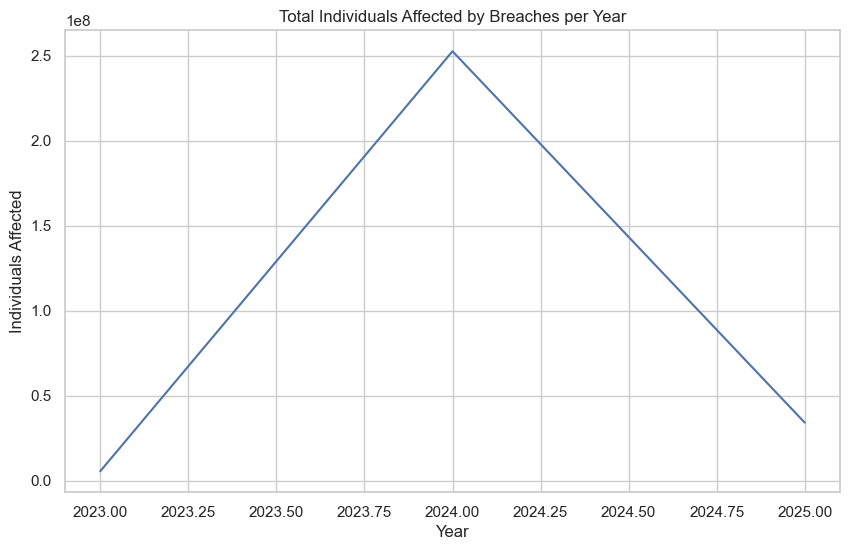

In [38]:
plt.figure(figsize=(10,6))
sns.lineplot(x=breaches_per_year.index, y=breaches_per_year.values)
plt.title("Total Individuals Affected by Breaches per Year")
plt.xlabel("Year")
plt.ylabel("Individuals Affected")
plt.show()


In [39]:
# Build a small table of outcome metrics by attack category
outcomes_lookup = pd.DataFrame({
    'attack_category': ['Hacking', 'Ransomware', 'Physical Theft', 'Physical Loss', 'Access Disclosure', 'Other'],
    'estimated_financial_loss': [1500000, 2000000, 500000, 300000, 700000, 600000],  # USD
    'avg_downtime_days': [6, 10, 2, 1, 3, 3],                                         # days
    'disruption_likelihood': [0.6, 0.9, 0.2, 0.1, 0.4, 0.3]                           # probability 0–1
})

outcomes_lookup


,attack_category,estimated_financial_loss,avg_downtime_days,disruption_likelihood
0,Hacking,1500000,6,0.6
1,Ransomware,2000000,10,0.9
2,Physical Theft,500000,2,0.2
3,Physical Loss,300000,1,0.1
4,Access Disclosure,700000,3,0.4
5,Other,600000,3,0.3


In [40]:
# Left-join so you keep all HHS breach rows and add outcome columns where available
df = df.merge(outcomes_lookup, on='attack_category', how='left')

# Inspect the new columns
df[['attack_category', 'estimated_financial_loss', 'avg_downtime_days', 'disruption_likelihood']].head()


,attack_category,estimated_financial_loss,avg_downtime_days,disruption_likelihood
0,Physical Loss,300000,1,0.1
1,Access Disclosure,700000,3,0.4
2,Hacking,1500000,6,0.6
3,Hacking,1500000,6,0.6
4,Hacking,1500000,6,0.6


In [41]:
# Feature: individuals affected (you can add more later)
X = df[['individuals affected']].fillna(0)

# Target: estimated financial loss from the merged lookup
y = df['estimated_financial_loss'].fillna(0)

# Quick check of shapes
X.shape, y.shape


((738, 1), (738,))

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a basic linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


R² Score: -0.0016139539627022526
MAE: 222337.44313769304


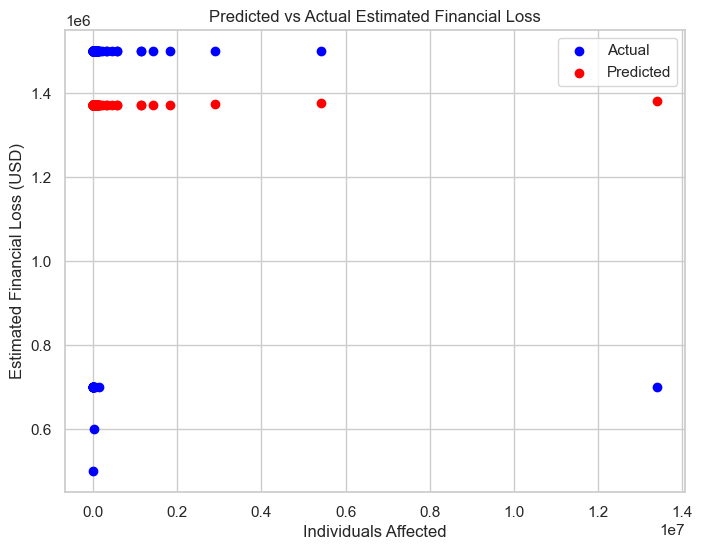

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_pred, color="red", label="Predicted")
plt.title("Predicted vs Actual Estimated Financial Loss")
plt.xlabel("Individuals Affected")
plt.ylabel("Estimated Financial Loss (USD)")
plt.legend()
plt.show()


In [53]:
# Count breaches by year and attack category
breach_counts = df.groupby(['year', 'attack_category']).size().reset_index(name='count')

# Quick look
breach_counts.head()


,year,attack_category,count
0,2023,Hacking,18
1,2024,Access Disclosure,30
2,2024,Hacking,229
3,2024,Other,1
4,2024,Physical Loss,1


In [55]:
# Pivot so each attack category becomes a column
breach_pivot = breach_counts.pivot(index='year', columns='attack_category', values='count').fillna(0)

# Preview the pivoted table
breach_pivot.head(5)


attack_category,Access Disclosure,Hacking,Other,Physical Loss,Physical Theft
year,,,,,
2023,0.0,18.0,0.0,0.0,0.0
2024,30.0,229.0,1.0,1.0,3.0
2025,76.0,374.0,1.0,1.0,4.0


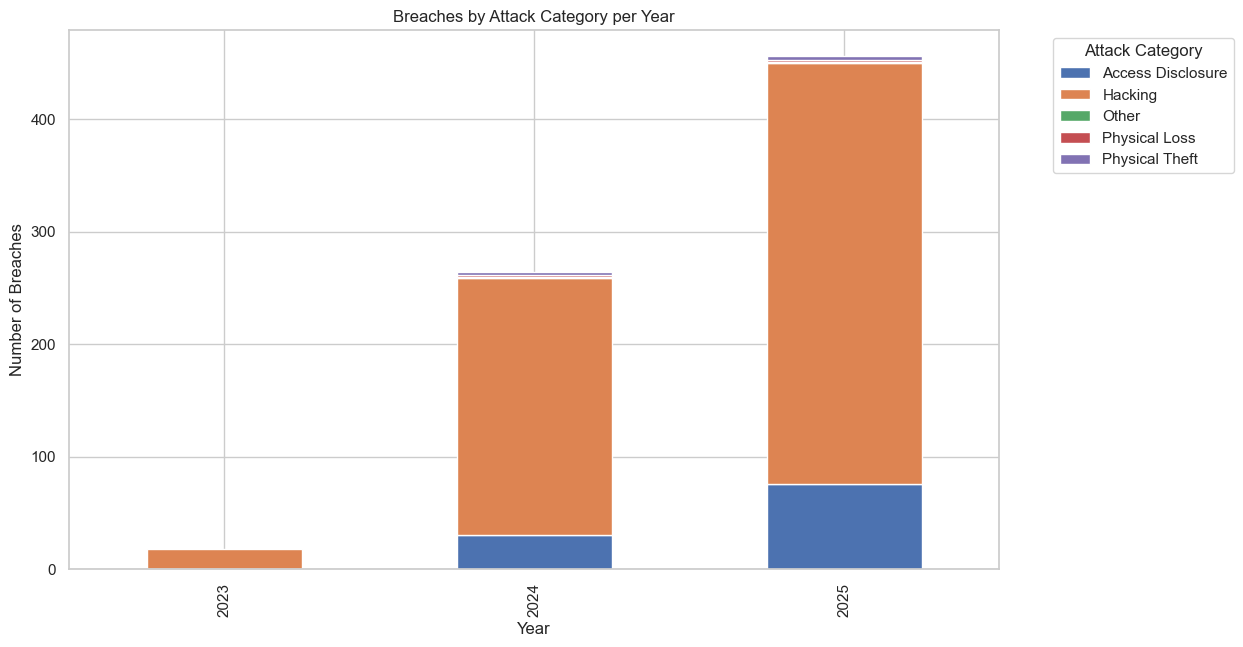

In [56]:
# Plot stacked bar chart
breach_pivot.plot(kind='bar', stacked=True, figsize=(12,7))

plt.title("Breaches by Attack Category per Year")
plt.xlabel("Year")
plt.ylabel("Number of Breaches")
plt.legend(title="Attack Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
